In [231]:
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

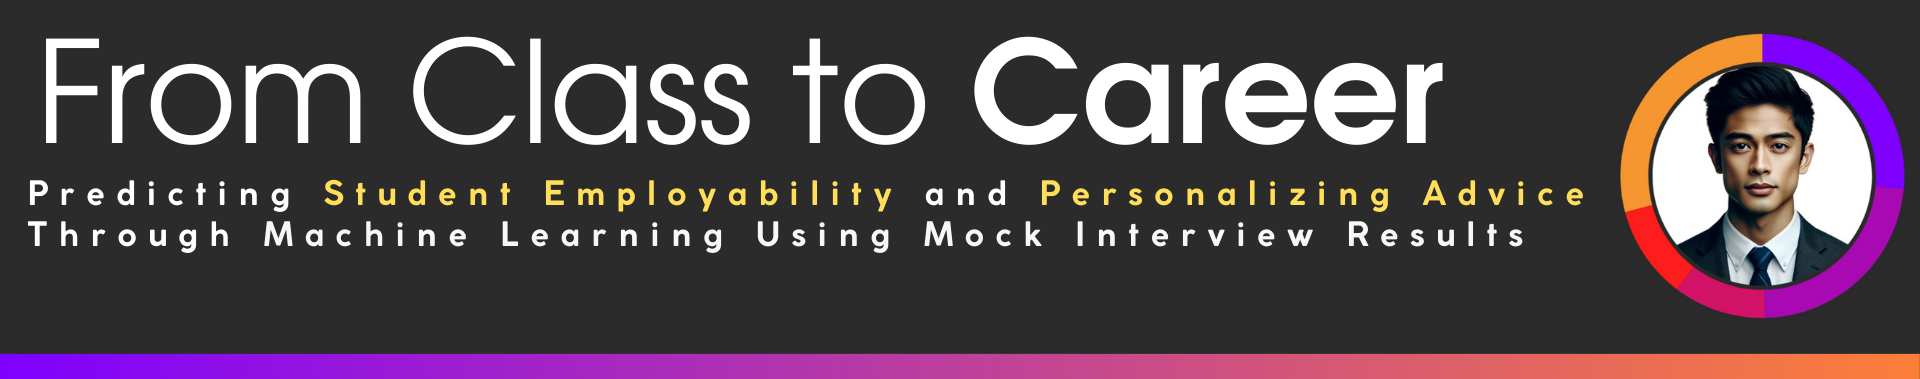

<div style="padding:3px; background-size: cover; color:white; background-image: url('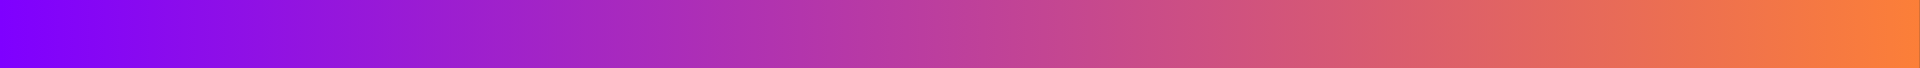')">
    <a name="top"></a>
    <h4>Table of Contents:</h4>
    <!-- Your table of contents items here -->
</div>

[ref0]: #abstract
- [Abstract][ref0]

[ref1]: #highlights
- [Highlights][ref1]

[ref2]: #intro
- [Introduction][ref2]

[ref3]: #data
- [Data and Methods][ref3]

[ref4]: #results
- [Results and Discussion][ref4]

[ref5]: #conclusion
- [Conclusion and Recommendation][ref5]

[ref6]: #references
- [References][ref6]

[ref7]: #appendix
- [Appendix][ref7]
</div>

# 
<a name="abstract"></a>
<h2 style=" color: #045a63">I. Abstract</h2>




This study leverages machine learning techniques to predict the employability of students based on mock interview results from the Technological Institute of the Philippines (TIP). The dataset comprises 2 982 entries, assessing students on various attributes like General Appearance, Communication Skill, and Mental Alertness. It also contains their On-the-Job Training (OJT) employability assessments of either  Employable” or ”Less Employable”. Our objective was to identify key factors influencing employability to provide individualized advice for improvi ng professional qualities.

Multiple machine learning (ML) models were evaluated across different resampling techniques. The XGBClassifier, with specific hyperparameters (learning rate=0.2, max depth=6, and n estimators=200), and utilizing Random Undersampling, emerged as the optimal model, achieving 85% accuracy and an AUPRC of 0.96.

Further analysis employed Diverse Counterfactual Explanations (DiCE) and SHapley Additive exPlanations (SHAP) to dissect local feature importance and generate counterfactual scenarios, offering individualized pathways for improving student employability. SHAP global feature analysis revealed that Mental Alertness stood out as the most significant factor, accounting for an average impact of 12% on a TIP student’s likelihood of success, either enhancing or diminishing their prospects.

This study also highlights the relatively low barrier to entry of an ML-powered mock interview employability screening, achieving 80% accuracy with as few as 500 mock interview results. This suggests that educational institutions can swiftly adopt such a predictive framework to enhance their mock interview programs, significantly boosting students’ job prospects.


[ref]: #top
[Back to Table of Contents][ref]

# 
<a name="highlights"></a> <h2 style=" color: #045a63">II. Highlights</h2>



* 86% Test Accuracy was achieved using XGBoost and Random Undersampling.
* Mental Alertness was the top global feature predicting employability of TIP students based on SHAP value.
* DiCE counterfactuals provide individualized insights and recommendations for students’ areas of improvement.
* 80% accuracy was achieved with a random sample of only 500 data points, indicating good deployment feasibility.

[ref]: #top
[Back to Table of Contents][ref]

# <a name="intro"></a>
<h2 style=" color: #045a63">III. Introduction</h2>



The Commission on Higher Education (CHED) in the Philippines mandates Internship or On-the-Job Training (OJT) programs in most undergraduate programs to bridge the gap between theoretical knowledge and practical experience [1]. Complementing these OJT programs, many universities taken to holding mock interviews [2]. These mock interviews allow institutions to assess student employability, identify strengths and weaknesses, and tailor training programs accordingly through targeted interventions. Through analyzing mock interview data and highlighting students' strengths and weaknesses, universities better bridge the gap between education and employment.

Informed by this, our study aimed to use mock interview results to train an ML model to predict student employability, and provide better individualized advice by leveraging Explainable AI in SHAP explanations [3] and DiCE counterfactuals [4].

## <a name="rrl"></a>
<h3 style=" color: #045a63">IIIa. Related Literature and Contribution</h2>
Casuat et al. [5] from the Technological Institute of the Philippines (TIP) put together the seminal student employability dataset in 2020 from 2,982 mock job interview results and other various assessments between 2015 and 2018. Preprocssing the data through SMOTE and training a support vector machine, they yielded an test accuracy of 92.2%.

%five machine learning techniques were used to forecast students' employability prospects. These are decision tree (DT), random forest (RF), K-Nearest Neighbor (KNN), Logistic Regression (LR), and support vector machine (SVM). They also used SMOTE to handle an imbalanced dataset. Their findings revealed that the SVM algorithm outperformed the others, yielding the highest accuracy of 92.22% on the student employability dataset [5]. 

Vo et al. [6] in 2023 used the same dataset to demonstrate the novel OPT-BAG (OPTimisation of BAGging classifiers) algorithm, achieving a 91.15% test accuracy.

Our approach differs from that of both Casuat et. al [5] and Vo et al. [6] was to exclude the feature *student performance rating* in order to train a model that robustly predicts student employability using the subjective mock interview result features only, without any other assessments. In addition to this, we avoid using SMOTE oversampling or any interpolation-based oversampling technique, since the dataset itself consists of ordinal values, and putting values between them may alter the distribution. Our method also leverages interpretability techniques to create a proof-of-concept report that may be used by university counselors to provide individualized employablity interventions.

# <a name="data"></a>
<h2 style=" color: #045a63">IV. Data and Methods</h2>



## <a name="data"></a>
<h2 style="color: #045a63; font-size: 22px;">About the Data</h2>


The dataset consisted of mock job interview results and OJT employability assessments of 2,982 students from the TIP between 2015 and 2018, compiled and used in Casuat et al. [5]. The version obtained on Kaggle [7] did not include General Point Grade, Students' Program, and Student Number.

Student Performance Rating was dropped from the dataset since we were most interested in predicting the OJT employability assessment based on the qualitative mock interview results, rather than other assessments.

The features in the raw dataset are shown below, in Table 1:

<div align="center">


| Feature Name               | Data Type | Remarks                  |
|----------------------------|-----------|--------------------------|
| Name of Student            | String    | Anonymized, ID Feature   |
| General Appearance         | Integer   | Ordinal 1-5; Training Feature |
| Manner of Speaking         | Integer   | Ordinal 1-5; Training Feature |
| Physical Condition         | Integer   | Ordinal 1-5; Training Feature |
| Mental Alertness           | Integer   | Ordinal 1-5; Training Feature |
| Self-Confidence            | Integer   | Ordinal 1-5; Training Feature |
| Ability to Present Ideas   | Integer   | Ordinal 1-5; Training Feature |
| Communication Skills       | Integer   | Training Feature         |
| Student Performance Rating | Integer   | Ordinal 1-5; Dropped     |
| Employability Class        | String    | Binary "Employable, Less Employable"; Target Feature |

</div>

[ref]: #top
[Back to Table of Contents][ref]

## <a name="methodology"></a>
<h2 style=" color: #045a63; font-size: 22px;">Methodology</h2>


**Data Prep:**
Student Name and Student Performance Score were dropped, the latter due to the fact that this information would only be available after an OJT experience. Feature engineering was considered but not implemented. This included calculating the total sum of all features, as well as their average. This did not improve accuracy and would also present difficulty in interpretation.

**Data Exploration:**
The project commenced with a thorough examination of the dataset, which revealed a slight imbalance in the target variable for binary classification. An analysis of the features indicated that all were ordinal, with a moderate level of correlation observed among them, yet no direct strong correlation to the target class was detected. The proportional chance criterion was calculated at 1.25 times chance, resulting in a threshold of 64%.

**Model and Resampling Method Selection:**
The core of the methodology involved comparing various machine learning models and resampling techniques to address class imbalance and optimize performance. The models tested included Gradient Boosting Machine, XGBoost, Random Forest, Decision Tree, Logistic Regression (L2), and K-Nearest Neighbors. Resampling methods evaluated were Random Oversampling, Random Undersampling, TomekLinks, and No Resampling, explicitly excluding methods like SMOTE due to the ordinal nature of the data. The training dataset underwent resampling to mitigate the impact of class imbalance.

**Hyperparameter Tuning and Model Evaluation:**
Hyperparameter optimization was conducted through GridSearchCV for each combination of model and resampling method to enhance training accuracy. Performance metrics such as test accuracy, precision, recall, and Area Under the ROC Curve (AUC) were meticulously recorded for evaluation and comparison purposes.

**Final Model Production:**
Upon determining the optimal combination of model, parameters, and resampling method, the final model was constructed and applied to the resampled training dataset to prepare for deployment and further interpretability analysis.

**Interpretability:**
The interpretability segment aimed to explain the model's decision-making process, divided into global and local interpretability. Global interpretability involved using SHAP to calculate the average impact of each feature. Local interpretability was demonstrated through case studies of two students, analyzing the specific features that influenced their employability predictions using SHAP, followed by utilizing DiCE for generating counterfactual scenarios to suggest paths for achieving the desired classification.

**Deployability:**
The concluding phase focused on the deployability of the model, specifying the data collection prerequisites for institutions aspiring to implement a similar predictive system based on mock interviews. This involved repeated sampling of the original dataset at different levels, and recording a model's accuracy. 

### <a name="import"></a><h2 style=" color: #045a63; font-size: 22px">Import Libraries and Define Functions</h2>



In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import (
    LogisticRegression,
    Ridge,
    Lasso,
    LinearRegression,
    RidgeClassifier,
)
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    RandomForestRegressor,
    GradientBoostingRegressor,
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.calibration import CalibratedClassifierCV
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    make_scorer,
)
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, average_precision_score
import seaborn as sns
import time
import shap
import lime
from lime import lime_tabular
from sklearn.base import clone
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter
from sklearn.pipeline import Pipeline
from dice_ml import Model, Dice, Data
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [110]:
class NoResampling:
    def fit_resample(self, X, y):
        return X, y

    def fit(self, X, y):
        return self

    def set_params(self, **params):
        return self


def plot_roc(ax, X_train, y_train, X_test, y_test, title, clf=None):
    if clf == None:
        clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_test_pred)
    auc_score = metrics.roc_auc_score(y_test, y_test_pred)
    ax.plot(fpr, tpr, label=f"{title} AUC={auc_score:.3f}")

    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)


def plot_pr_curve(ax, X_train, y_train, X_test, y_test, title, clf=None):
    if clf is None:
        clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict_proba(X_test)[:, 1]

    pr, rc, thresh = precision_recall_curve(y_test, y_test_pred)
    auprc = metrics.auc(rc, pr)
    ax.plot(rc, pr, label=f"{title} AUPRC={auprc:.3f}")

    ax.set_title('Precision-Recall Curve')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc=0)


def get_performance_metrics(model, X_train, y_train, X_test, y_test, threshold=0.5):
    start_time = time.time()
    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities and use the threshold to convert them to binary predictions
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_pred_proba >= threshold).astype(int)

    # Calculate AUC and PRAUC
    auc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
    pr, rc, thr = precision_recall_curve(y_test, y_test_pred_proba)
    auprc_score = metrics.auc(rc, pr)

    # Calculate precision, recall and accuracy
    precision = metrics.precision_score(y_test, y_test_pred)
    recall = metrics.recall_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    end_time = time.time() - start_time

    return auc_score, auprc_score, f1, precision, recall, accuracy, end_time

### <a name="dat_prep"></a><h2 style=" color: #045a63; font-size: 22px">Data Loading and Preprocessing</h2>



*Note: Student Performance Rating was dropped as a feature this is an assessment obtained after the OJT rather than at the time of the mock interview.* 

*In practice, this field would not be available at the time of making a prediction.*

In [112]:
df = pd.read_excel('Student-Employability-Datasets.xlsx')
df.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [113]:
# Checking of Null Values
df.isna().sum()

Name of Student               0
GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [114]:
# Drop Unnecessary Columns
df.drop(columns=['Name of Student', 'Student Performance Rating'], inplace=True)

# Encode Target Column
df['CLASS'] = df['CLASS'].replace({'Employable': 1, 'LessEmployable': 0})

# Preview 
df.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,CLASS
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,0.579812
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.493672
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [115]:
# Split Data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Preview
display('X')
display(X.head())
display('y')
display(y.head())

'X'

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS
0,4,5,4,5,5,5,5
1,4,4,4,4,4,4,3
2,4,3,3,3,3,3,2
3,3,3,3,2,3,3,3
4,4,4,3,3,4,4,3


'y'

0    1
1    1
2    0
3    0
4    1
Name: CLASS, dtype: int64

### <h2 style=" color: #045a63; font-size: 22px">Data Exploration</h2>



**Proportional Chance Criterion (PCC)**

In understanding the underlying dataset, it was found that the dataset was slightly imbalanced between the classes. Nevertheless, the PCC was still useful for setting a minimum threshold to judge model quality. This was found to be 51%, or 64% after adjusting upwards with a common multiplier heuristic.  

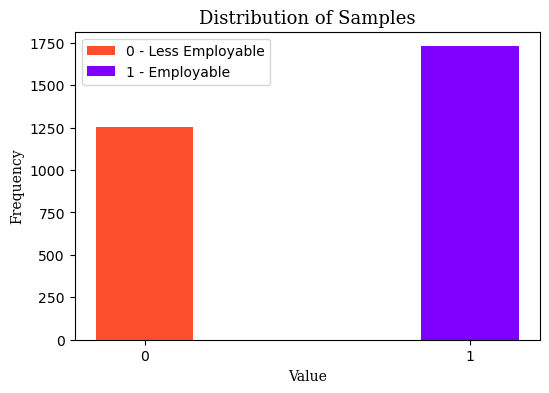

PCC: 51.27%
1.25*PCC: 64.09%


In [226]:
base_font = {'family': 'serif', 'color': 'black', 'weight': 'normal'}

font = base_font.copy()
font['size'] = 13

font2 = base_font.copy()
font2['size'] = 10

font3 = base_font.copy()
font3['size'] = 9.5

n_0 = np.sum(y == 0)
n_1 = np.sum(y == 1)
N = len(y)

PCC = (n_0/N)**2 + (n_1/N)**2

custom_color = ['#fd4e2e', '#7f00ff']


plt.figure(figsize=(6, 4))
bars = plt.bar(['0', '1'], [n_0, n_1], color=custom_color, width=0.3)
plt.xlabel('Value', fontdict=font2)
plt.ylabel('Frequency', fontdict=font2)
plt.legend(bars, ['0 - Less Employable', '1 - Employable'])
plt.title('Distribution of Samples', fontdict=font)
plt.show()

print(f"PCC: {PCC*100:.2f}%\n1.25*PCC: {PCC*1.25*100:.2f}%")

**Histogram and Correlation Heatmap**

The features were found to be ordinal, with most scores for all features between 3 and 5. In all cases with the exception of Communication Skills, the median was 4. Most features were found to be moderately correlated with each other, however, this will not present a challenge for interpretability due to the use of SHAP. SHAP effectively interprets the importance of correlated features by using game theory principles to fairly distribute prediction contributions among all features. This method ensures a balanced understanding of how correlated features influence model outcomes, providing a nuanced analysis of their roles.

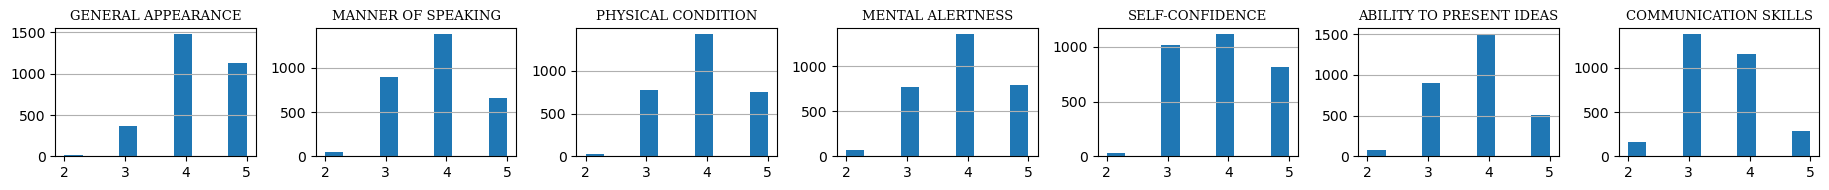

In [225]:
plt.figure(figsize=(len(X.columns) * 3, 2))

for i, column in enumerate(X.columns):
    plt.subplot(1, len(df.columns), i+1)
    X[column].hist()
    plt.title(f'{column}',fontdict=font3)
    plt.grid(axis='x')

plt.tight_layout()
plt.show()

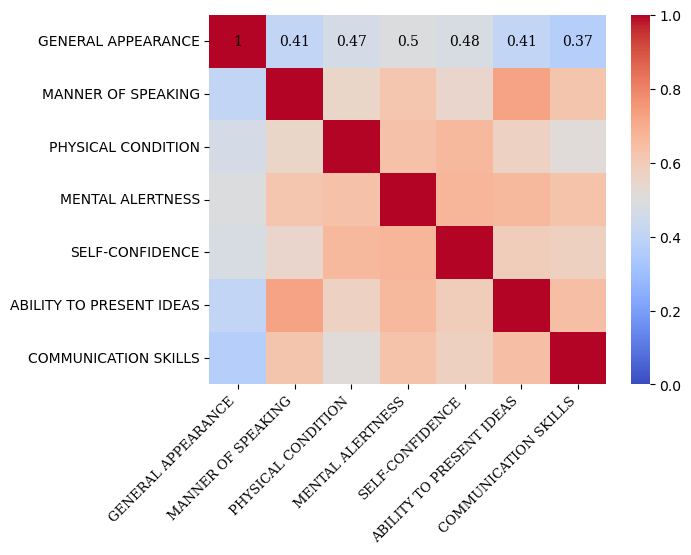

In [187]:
sns.heatmap(X.corr(), vmin=0, vmax=1, cmap='coolwarm', annot=True, annot_kws=font2)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontproperties(font3['family'])
    label.set_size(font3['size'])
    label.set_color(font3['color'])
    label.set_weight(font3['weight'])

plt.show()

**Box Plot**

The side-by-side box plots show that apart from `General Appearance` and `Ability to Present Ideas`, the *Employable* class has a consistently higher median in these features than the *Less Employable* class. `General Appearance` and `Ability to Present Ideas` have identical distributions. We also note that both `Physical Condition` and `Mental Awareness` have an outlying student with a low score in these, yet were still classed as *Employable*.

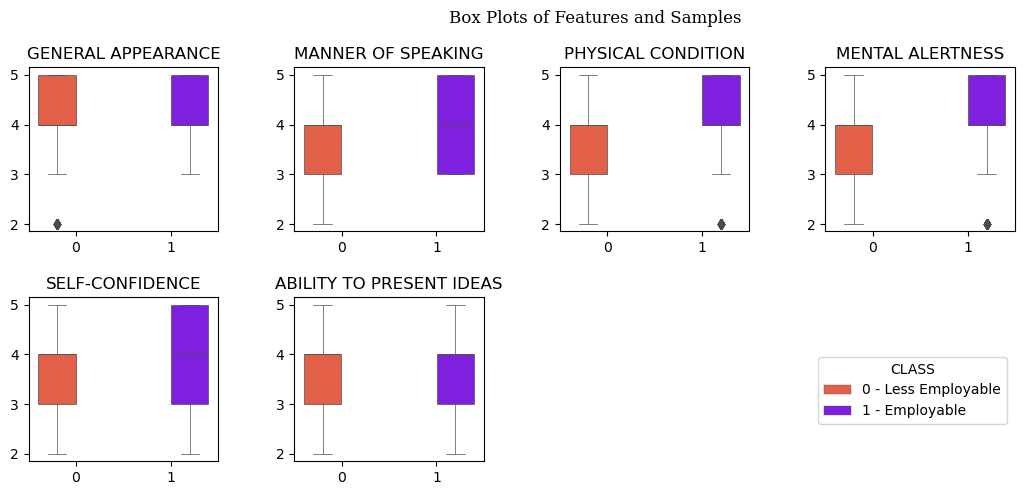

In [214]:
n_features = len(df.columns) - 2

custom_palette = {0: '#fd4e2e', 1: '#7f00ff'}
fig, axs = plt.subplots(2, 4, figsize=(12, 5))
axs = axs.flatten()

for i, feature in enumerate(df.columns[:-2]):
    ax = sns.boxplot(x='CLASS', y=feature, data=df, hue='CLASS',
                     palette=custom_palette, ax=axs[i], linewidth=0.5)
    axs[i].set_title(feature)
    ax.set_ylabel('', fontdict=font2)
    ax.set_xlabel('', fontdict=font2)
    ax.legend_.remove()

n_features = len(df.columns) - 2
for i in range(n_features, 8):
    fig.delaxes(axs[i])

handles, labels = axs[0].get_legend_handles_labels()
custom_labels = ['0 - Less Employable', '1 - Employable']
fig.legend(handles, custom_labels, loc='upper left',
           bbox_to_anchor=(0.68, 0.3), title='CLASS')
fig.suptitle("Box Plots of Features and Samples", fontdict=font3)
plt.tight_layout()
plt.subplots_adjust(right=0.85, wspace=0.4, hspace=0.4)
plt.show()

### <h2 style=" color: #045a63; font-size: 22px">Model and Resampling Selection</h2>



**Resampling Methods**

Random Oversampling, Random Undersampling, and TomekLinks were used for resampling the training dataset. Methods which employ interpolation to generate synthetic datapoints, such as SMOTE, were not used as all features were ordinal. The original dataset was also used.

**Models**

K-Nearest Neighbors, Logistic Regression (L2), XGBoost, Random Forest, Gradient Boosting Machine, and Decision Tree were all models utilized in this project. These were fit on each resampling method, and parameters were hyperparameter tuned using GridSearchCV.

[ref]: #top
[Back to Table of Contents][ref]

# <a name="results"></a><h2 style=" color: #045a63">Results and Discussion</h2>




**Outcome**

The final model was determined to be XGBClassifier(learning_rate=0.2, max_depth=6, n_estimators=200), fit on randomly undersampled training data. This was due to its high model accuracy of 86% and AUPRC of 96%. This model will be used in the subsequent Interpretability section in order to understand both local and global feature importances.

In [12]:
resampling_methods = {
    'Original': NoResampling(),
    'ROS': RandomOverSampler(),
    'RUS': RandomUnderSampler(),
    'TOMEK': TomekLinks(),
}

# Selected Models

clf_models = {
    'KNN': KNeighborsClassifier(),
    'Logit_L2': LogisticRegression(penalty='l2', solver='liblinear', max_iter=5000),
    'XGBClassifier': XGBClassifier(),
    'RF': RandomForestClassifier(),
    'GBM': GradientBoostingClassifier(),
    # 'SVM': CalibratedClassifierCV(LinearSVC(max_iter=5000, dual=True)),
    'DT': DecisionTreeClassifier()
}

param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7],
    },
    'Logit_L2': {
        'C': [0.01, 0.1, 1]
    },
    'XGBClassifier': {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [6, 7, 8],
        'n_estimators': [100, 200]
    },
    'RF': {
        'max_depth': [4, 5, None],
        'n_estimators': [100, 200]
    },
    'GBM': {
        'max_depth': [4, 5, None],
        'n_estimators': [100, 200]
    },
    # 'SVM': {
    #     'method': ['sigmoid', 'isotonic']
    # },
    'DT': {
        'max_depth': [1, 3, 5]
    }
}

In [13]:
# Initialize to store results
results = []
best_models_dict = {}

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=69)

for resample_method, resampler in resampling_methods.items():
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    for model_name, model in clf_models.items():
        full_model_sampling_name = f'{model_name}-{resample_method}'
        if model_name in param_grids:
            grid_search = GridSearchCV(model, param_grids[model_name], cv=10, scoring='accuracy', return_train_score=True)
            grid_search.fit(X_resampled, y_resampled)
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            best_index = grid_search.best_index_
            params_str = ', '.join(f'{key}={value}' for key, value in best_params.items())
            model_str = f"{best_model.__class__.__name__}({params_str})"
            train_accuracy = grid_search.cv_results_['mean_train_score'][best_index]
        else:
            best_model = model.fit(X_resampled, y_resampled)

        best_models_dict[full_model_sampling_name] = model_str

        # Predict on test set
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        test_accuracy = accuracy_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        auprc_score = average_precision_score(y_test, y_pred_proba)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Append results
        results.append({
            'Model-Resampling': f'{model_name}-{resample_method}',
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'AUC': auc_score,
            'PR-AUC': auprc_score,
            'F1': f1,
            'Precision': precision,
            'Recall': recall,
        })

results_df = pd.DataFrame(results)

In [14]:
results_df_sorted = results_df.sort_values(by=[
    'Test Accuracy', 'PR-AUC'], ascending=[False, False]).reset_index(drop=True)

results_df_sorted.head(15)

,Model-Resampling,Train Accuracy,Test Accuracy,AUC,PR-AUC,F1,Precision,Recall
0,RF-ROS,0.853567,0.860590,0.949277,0.962371,0.879630,0.881671,0.877598
1,GBM-RUS,0.861998,0.855228,0.949099,0.962346,0.877551,0.861915,0.893764
2,RF-RUS,0.861998,0.855228,0.948015,0.961711,0.877551,0.861915,0.893764
3,GBM-ROS,0.853309,0.853887,0.947856,0.961564,0.875143,0.868182,0.882217
4,XGBClassifier-RUS,0.861998,0.851206,0.947509,0.961752,0.875421,0.851528,0.900693
5,KNN-Original,0.852365,0.845845,0.924791,0.921578,0.877005,0.816733,0.946882
6,KNN-TOMEK,0.852365,0.845845,0.924791,0.921578,0.877005,0.816733,0.946882
7,RF-TOMEK,0.862155,0.844504,0.948834,0.962013,0.871397,0.837953,0.907621
8,XGBClassifier-Original,0.861857,0.844504,0.947163,0.961045,0.872527,0.832285,0.916859
9,XGBClassifier-TOMEK,0.861857,0.844504,0.947163,0.961045,0.872527,0.832285,0.916859


In [15]:
# Get Params of Best Model
best_models_dict['XGBClassifier-RUS']

'XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=200)'

**Final Model**

The above identified the optimal model and its hyperparameter tuned settings for the final model, which was then fit on resampled training data. This final model will be what will be passed to the DiCE model and SHAP explainer for interpretability.

In [16]:
# Use best resampler for model fitting
resampler = RandomUnderSampler()
X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

# Fit final model using best model and best resampler
final_model = XGBClassifier(learning_rate=0.2, max_depth=6, n_estimators=200).fit(X_resampled, y_resampled)

## <h2 style=" color: #045a63; font-size: 22">Interpretability</h2>



#### Global Interpretability using SHAP

SHAP is recommended for global interpretability because it offers a unique blend of individual prediction explanations and aggregate insights. By calculating the contribution of each feature to every prediction, SHAP allows for a nuanced understanding of model behavior on a global scale. It distinguishes itself by ensuring that even in complex models, where interactions and correlations among features can obscure their effects, the impact of each feature is clearly quantified and understood. This makes SHAP a powerful tool for unveiling the underlying patterns and influences within a model, facilitating more informed decision-making and model improvement efforts.

Using this approach, Mental Alertness was identified as the top feature, contributing 12% on average to each student's predicted probability of success.

Exact explainer: 2983it [05:42,  8.49it/s]                          


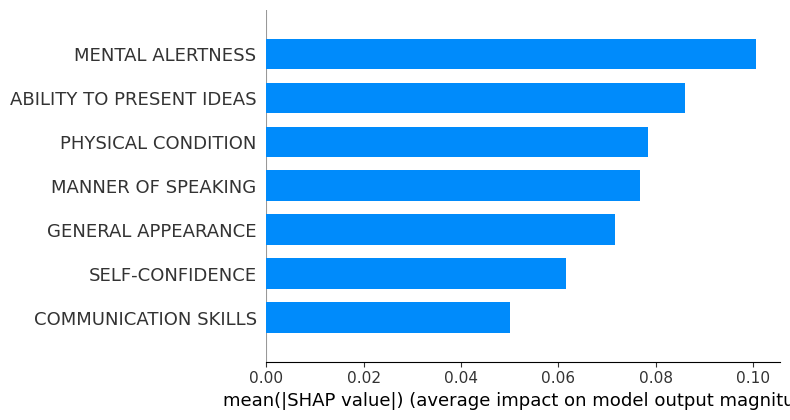

In [17]:
explainer = shap.Explainer(final_model.predict_proba, X)
shap_values = explainer(X)
shap_values_class1 = shap_values[:, :, 1]

shap.summary_plot(shap_values_class1, X_test, plot_type="bar")
plt.show()

**Beeswarm Plot**

The Beeswarm Plot reveals a minimal correlation between feature values and their corresponding SHAP values, which might initially seem perplexing. In simpler terms, this indicates that the SHAP value assigned to a specific feature is influenced by the values of all other features in the dataset. For instance, a rating of 4 in Mental Alertness could result in a negative SHAP value if all other features are rated higher, at 5. On the other hand, the same rating of 4 in Mental Alertness could lead to a positive SHAP value if the ratings for all other features are lower, at 3. This illustrates how SHAP values reflect the contextual importance of a feature within a particular data entry.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


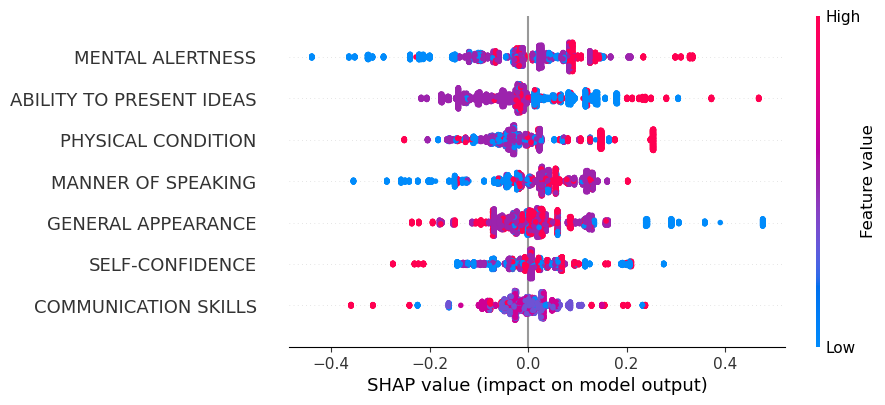

In [18]:
shap.plots.beeswarm(shap_values_class1)
plt.show()

#### Local Interpretability using SHAP and DiCE

#### DiCE Setup

*Note: In the context of using DiCE for machine learning model explanations, the explainer is designed to explain the model's predictions rather than the actual outcomes. Therefore, the model's predictions were used as the outcome to be explained. This approach enables generation of counterfactual explanations that show how input features might be altered to achieve a different prediction from the model.*

In [19]:
# Dice Setup
y_pred = pd.Series(final_model.predict(X), name='Predicted Employability')

pipe = final_model
continuous_feats = X.columns.tolist()

dicemodel = Model(model=pipe, backend='sklearn', model_type='classifier')

dice_data = Data(
    dataframe=X.join(y_pred),
    continuous_features=continuous_feats,
    outcome_name=y_pred.name)

#### Case 1: A Less Employable Student

**Student 15**

Student 15 is currently predicted to be Less Employable.

In [20]:
student_id = 15
predicted_class = y_pred.iloc[student_id]

display(X.iloc[[student_id]])
print(f'Predicted Employability: {predicted_class}')

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS
15,3,3,3,3,3,3,3


Predicted Employability: 0


**Understanding the Prediction**

The SHAP Waterfall plot below illustrates how Student 15's feature values contribute positively or negatively to the student's probability of success. There are three main key takeaways:

* The baseline probability for all students is 53%
* Student 15's feature values drop this down to a final probability of 28% 
* Despite the student scoring 3's in all features, certain features such as Mental Alertness weigh more heavily than others

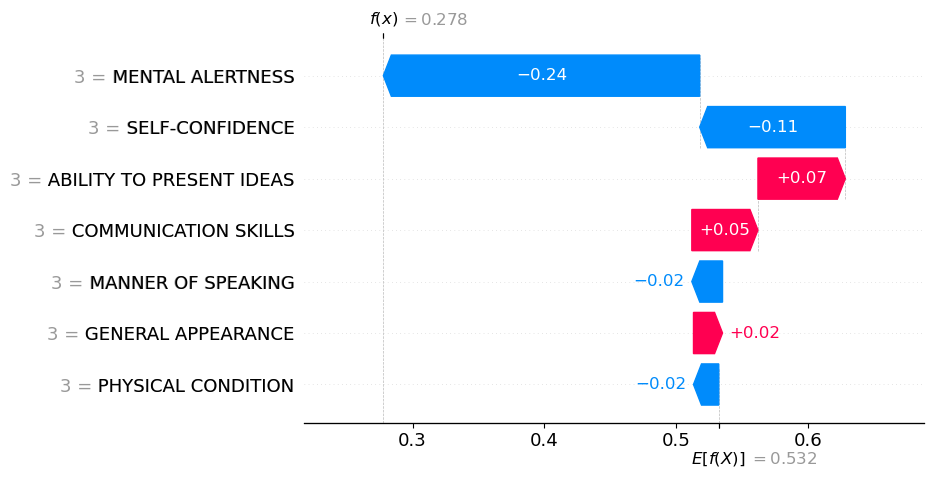

In [21]:
shap.plots.waterfall(shap_values_class1[student_id])
plt.show()

**Identifying Paths to Improvement**

DiCE generates counterfactual explanations by optimizing for minimal changes to the input features that would change the model's prediction to a desired outcome. These counterfactuals are as similar to the current state as possible, while still achieving the opposite predicted class. 

In the context to Student 15, counterfactual explanations were generated to provide possible recommended paths for improvement to become predicted as Employable. In many scenarios, just improving one feature by 1 was enough to reach the opposite predicted class. This offers Student 15 options if Student 15 struggles in improving some areas over others. 

As counterfactuals are from Less Employable to Employable, permitted ranges were restricted to only increase per feature. 

In [22]:
permitted_range = dict()
for column in X.columns:
    permitted_range[column] = [X[column].iloc[student_id], 5]

dice_exp = Dice(dice_data, dicemodel, method='genetic')
cfes1 = dice_exp.generate_counterfactuals(
    X.iloc[[student_id]],
    total_CFs=5,
    desired_class='opposite',
    features_to_vary=X.columns.tolist(),
    permitted_range=permitted_range 
)

cfes1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:03<00:00,  3.49s/it]

Query instance (original outcome : 0)


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Predicted Employability
0,3,3,3,3,3,3,3,0



Diverse Counterfactual set (new outcome: 1)


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Predicted Employability
0,-,-,-,-,4,-,-,1
0,-,-,-,4,-,-,-,1
0,4,-,-,-,-,-,-,1
0,-,-,-,-,5,-,-,1
0,-,-,-,-,4,4,-,1


#### Case 2: An Employable Student

Student 8 is currently predicted to be Employable.

In [23]:
student_id = 8
predicted_class = y_pred.iloc[student_id]

display(X.iloc[[student_id]])
print(f'Predicted Employability: {predicted_class}')

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS
8,4,4,4,4,4,4,4


Predicted Employability: 1


**Understanding the Prediction**

The SHAP Waterfall plot below illustrates how Student 8's feature values contribute positively or negatively to the student's probability of success. There are two main key takeaways:

* Despite a positive prediction, the predicted probability is only 53% which puts Student 8 at high risk for failure 
* The Ability to Present Ideas, while equal to all other feature values, drags down Student 8's probability, indicating that this feature is relative and may require a higher standard by employers than other features

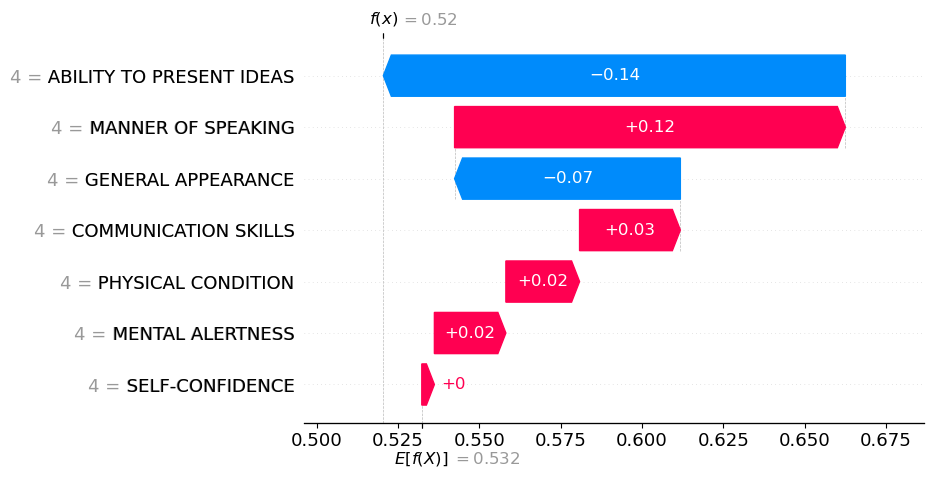

In [24]:
shap.plots.waterfall(shap_values_class1[student_id])
plt.show()

**Identifying at Risk Areas**

Counterfactual explanations indicate the areas which could alter the predicted class if they are minimally changed. In the context of Student 8, it was identified that if even one of Physical Condition or Communication Skills fell slightly, this would be enough to become predicted as "Less Employable". Further coutnerfactuals would require greater declines in more features, indicating that it is Physical Condition and Communication that should be the key areas of focus to maintain predicted Employability. 

As counterfactuals are from Employable to Less Employable, permitted ranges were restricted to only decrease per feature. 

In [25]:
permitted_range = dict()
for column in X.columns:
    permitted_range[column] = [1, X[column].iloc[student_id]]

cfes2 = dice_exp.generate_counterfactuals(
    X.iloc[[student_id]],
    total_CFs=5,
    desired_class='opposite',
    features_to_vary=X.columns.tolist(),
    permitted_range=permitted_range 
)

cfes2.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:27<00:00, 27.94s/it]

Query instance (original outcome : 1)


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Predicted Employability
0,4,4,4,4,4,4,4,1



Diverse Counterfactual set (new outcome: 0)


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Predicted Employability
0,-,-,3,-,-,-,-,0
0,-,-,-,-,-,-,3,0
0,2,-,-,2,2,-,3,0
0,2,-,1,3,-,-,2,0


## <h2 style=" color: #045a63">Deployability</h2>



Deployability of the model was considered an essential aspect of this model. Ideally, a model would be able to achieve high accuracy without requiring a large amount of data as data collection is often arduous, lengthy, and costly. Fortunately, it was found that as little as 500 mock interviews could already achieve an 80% test accuracy. This means that this model can be deployed and made useful within one or two school batches, making this accessible for many universities to pursue and implement.

In [26]:
sample_sizes = np.arange(50, len(X), 50)
mean_accuracies, std_accuracies = [0], [0]

for sample_size in sample_sizes:
    accuracies = []
    for _ in range(10):
        df_sample = df.sample(sample_size)
        X = df_sample.iloc[:, 0:7]
        y = df_sample.iloc[:, -1]

        resampler = RandomUnderSampler()
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
        X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
        
        model = XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=200).fit(X_resampled, y_resampled)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    std_accuracy = np.std(accuracies)
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)
    std_accuracies.append(std_accuracy)

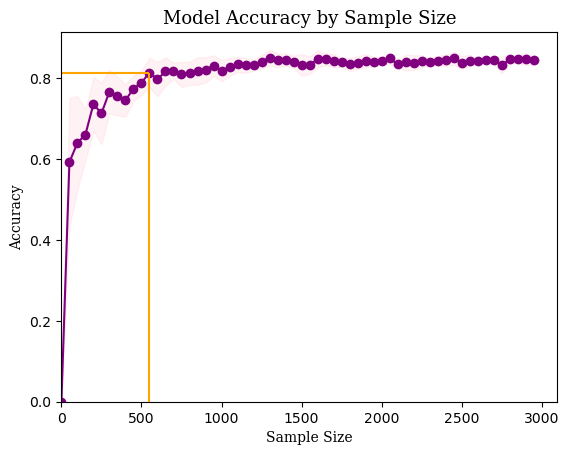

In [108]:
sample_sizes0 = np.insert(sample_sizes, 0, 0)
upper_bound = [a + s for a, s in zip(mean_accuracies, std_accuracies)]
lower_bound = [a - s for a, s in zip(mean_accuracies, std_accuracies)]

y_value = np.array(mean_accuracies)[np.where(sample_sizes0==500)][0]
print(y_value)

plt.fill_between(sample_sizes0, lower_bound, upper_bound, color='blue', alpha=0.2)
plt.plot(sample_sizes0, mean_accuracies, marker='o', linestyle='-', color='b')
plt.hlines(y=y_value, xmin=0, xmax=500, color='r', linestyle='--')
plt.vlines(x=500, ymin=0, ymax=y_value, color='r', linestyle='--')
plt.xlim([0, None])
plt.ylim([0, None])
plt.title('Model Accuracy by Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

[ref]: #top
[Back to Table of Contents][ref]

# <a name="conclusion"></a> <h2 style=" color: #045a63">Conclusion and Recommendation</h2>



### <a name="conclusion"></a> <h2 style=" color: #045a63; font-size: 22px">Conclusions</h2>

This study successfully developed a machine learning model to predict student employability based on mock interview results. The XGBoost classifier with random undersampling emerged as the optimal model, achieving 85\% accuracy and an impressive 0.96 AUPRC score. The model's performance showcases the potential of leveraging machine learning techniques to assess and enhance students' professional readiness.

Through SHAP analysis, this study identified Mental Alertness as the most significant factor influencing employability predictions among TIP students, contributing an average of 12\% to each student's likelihood of success. This finding underscores the importance of developing students' critical thinking ability and responding effectively in interview situations.

Moreover, the application of DiCE generated individualized recommendations for improving specific areas and providing tailored guidance to students based on their strengths and weaknesses.

Remarkably, the model demonstrated robustness and **ease of deployment, achieving 80\% accuracy with as few as 500 mock interview results.** This highlights the potential for educational institutions to swiftly adopt such a predictive framework, fostering a more efficient and effective approach to bridging the gap between academia and industry.


### <a name="conclusion"></a> <h2 style=" color: #045a63; font-size: 22px">Recommendations</h2>

We recommended that universities explore integrating mock interview simulations and assessments into their curricula based on their demonstrated predictive power, adapting and tailoring our methodology to their own institutions, programs, and preferred interview questions. Using our approach, they would leverage interpretability methods to offer tailored advice to students. Doing so, they may streamline the process of identifying areas for improvement and provide targeted interventions, ultimately ensuring that graduates are better equipped to navigate the competitive job market successfully.

[ref]: #top
[Back to Table of Contents][ref]

# <a name="references"></a> <h2 style=" color: #045a63">References</h2>



1. Commission on Higher Education: Revised Guidelines for Student Internship Program in the Philippines (SIPP)
for All Programs (CMO No. 104, S. 2017). Retrieved March 10, 2024.
https://ched.gov.ph/wp-content/uploads/2018/03/CMO-NO.-104-S.-2017.pdf
2. Huss, R., Jhileek, T., Butler, J.: Mock Interviews in the Workplace: Giving Interns the Skills They Need for
Success. The University of West Georgia and Academy for Advanced Studies (2017)
3. Lipovetsky, S., Conklin, M.: Analysis of regression in game theory approach. Applied Stochastic Models in
Business and Industry 17(4) (2001)
4. Mothlilal, R., Sharma, A., Tan, C.: Explaining machine learning classifiers through diverse counterfactual explanations. Conference on Fairness, Accountability, and Transparency, 607-617 (2020)
5. Casuat, C.D., Festijo, E.D., Alon, A.S.: Predicting Students' Employability using Support Vector Machine: A SMOTE-Optimized Machine Learning System. International Journal of Emerging Technologies in Engineering
Research (IJETER) 10(2) (2020)
6. Vo, M.-T., Nguyen, T., Le, T.: OPT-BAG Model for Predicting Student Employability. Computers, Materials &
Continua 76(2) (2023)
7. Kaggle - Students' Employability Dataset - Philippines. Retrieved February 23, 2024.
https://www.kaggle.com/datasets/anashamoutni/students-employability-dataset

[ref]: #top
[Back to Table of Contents][ref]

# <a name="appendix"></a> <h2 style=" color: #045a63">Appendix</h2>



[ref]: #top
[Back to Table of Contents][ref]